In [1]:
import numpy as np 
import pandas as pd 
import glob 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go

import folium

from folium import plugins
from geopy.geocoders import Nominatim
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster, FastMarkerCluster

In [2]:
rs_df = pd.read_csv('../input/data-rs-rujukan-covid-jakarta/daftar-rumah-sakit-rujukan-penanggulangan-covid-19.csv', sep = ';')

In [3]:
rs_df

,nama_rumah_sakit,alamat,kota_madya,kelurahan,kecamatan,lat,lon
0,RSUD Tarakan,JL. KYAI CARINGIN NO.7,JAKARTA PUSAT,CIDENG,GAMBIR,-6.171600,106.810499
1,RSUD KOJA,JL. DELI NO.4,JAKARTA UTARA,KOJA,KOJA,-6.108389,106.900139
2,RSKD DUREN SAWIT,JL. DUREN SAWIT BARU NO.2,JAKARTA TIMUR,DUREN SAWIT,DUREN SAWIT,-6.231628,106.909398
3,RS PERTAMINA JAYA,JL. AHMAD YANI NO.2 BY PASS,JAKARTA PUSAT,CEMPAKA PUTIH TIMUR,CEMPAKA PUTIH,-6.172803,106.876154
4,RS PELNI,JL. AIPDA K.S TUBUN NO. 92-94,JAKARTA BARAT,SLIPI,PALMERAH,-6.192845,106.803756
...,...,...,...,...,...,...,...
88,RS OLAHRAGA NASIONAL,JL. DAMBORE NOMOR 1,JAKARTA TIMUR,CIBUBUR,CIRACAS,-6.368580,106.892793
89,RS OMNI MEDICAL CENTER,JL. PULOMAS BARAT VI NO.20,JAKARTA TIMUR,KAYU PUTIH,PULOGADUNG,-6.180246,106.883835
90,RS UKRIDA,JL. ARJUNA UTARA NO. 6,JAKARTA BARAT,DURI KEPA,KEBON JERUK,-6.185349,106.780976
91,RS ANTAM MEDIKA,JL. PEMUDA RAYA NO. 1A,JAKARTA TIMUR,JATINEGARA KAUM,PULOGADUNG,-6.192698,106.902681


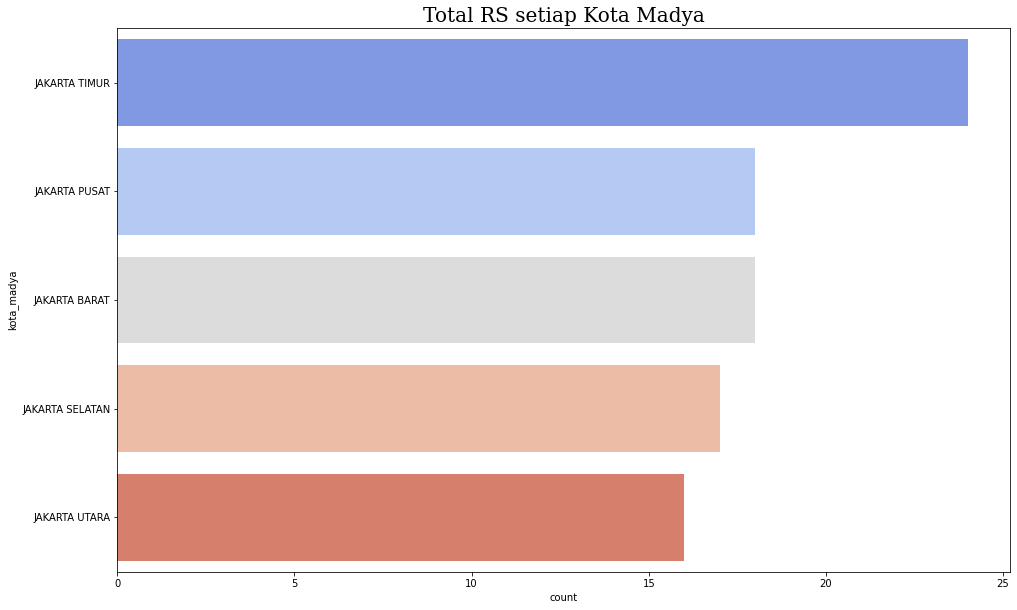

In [4]:
plt.figure(figsize=(16, 10))
sns.countplot(y='kota_madya', data=rs_df, order=rs_df["kota_madya"].value_counts().index[:10],palette = 'coolwarm')
plt.title("Total RS setiap Kota Madya",font="Serif", size=20)
plt.show()

In [5]:
rs_df["kota_madya"].value_counts()

JAKARTA TIMUR      24
JAKARTA PUSAT      18
JAKARTA BARAT      18
JAKARTA SELATAN    17
JAKARTA UTARA      16
Name: kota_madya, dtype: int64

Text(0.5, 1.0, 'Persentase RS tiap Kota Madya')

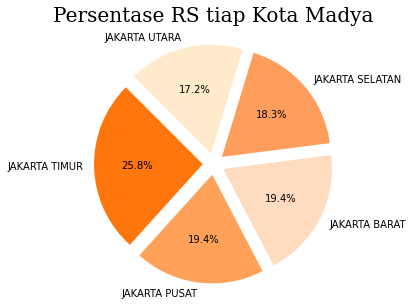

In [6]:
rs_df['kota_madya'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1,0.1,0.1], fontsize=10, autopct='%3.1f%%', 
                                               figsize=(5,5), startangle=135, legend=False, colors=['#ff760d','#ffa159','#ffdbbf','#ff9d5c','#ffeacc'])
plt.ylabel('')
plt.title("Persentase RS tiap Kota Madya",font="Serif", size=20)
# plt.xlabel('RS Kota Madya', size=20)

In [7]:
def generateBaseMap():
    base_map = folium.Map(location = [-6.200000, 106.816666], zoom_start = 11.5)
    return base_map

In [8]:
basemap=generateBaseMap()

In [9]:
HeatMap(rs_df[['lat','lon']],zoom=20,radius=20).add_to(basemap)

In [10]:
average_engagement = plugins.MarkerCluster().add_to(basemap)
for lat, long, label, alamat in zip(rs_df.lat, rs_df.lon, rs_df.nama_rumah_sakit, rs_df.alamat):
    folium.Marker(
        location=[lat,long],
        icon=None,
        popup=[label,alamat],
    ).add_to(average_engagement)

basemap